<a href="https://colab.research.google.com/github/kmvenkatesh04/Data-Science-Engg/blob/master/BITSWILP_SEM2_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
from scipy import stats

outlier_detection = DBSCAN(eps = 0.0375, metric='euclidean', min_samples = 3)
ranfor = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
featur_select = BorutaPy(ranfor, n_estimators='auto', verbose=2, random_state=1, max_iter = 100)

pca = PCA(n_components=2)
oversample = SMOTE(random_state = 0)
RandUnderSamplr = RandomUnderSampler(random_state=0)
svmsmote = SVMSMOTE(random_state=42)

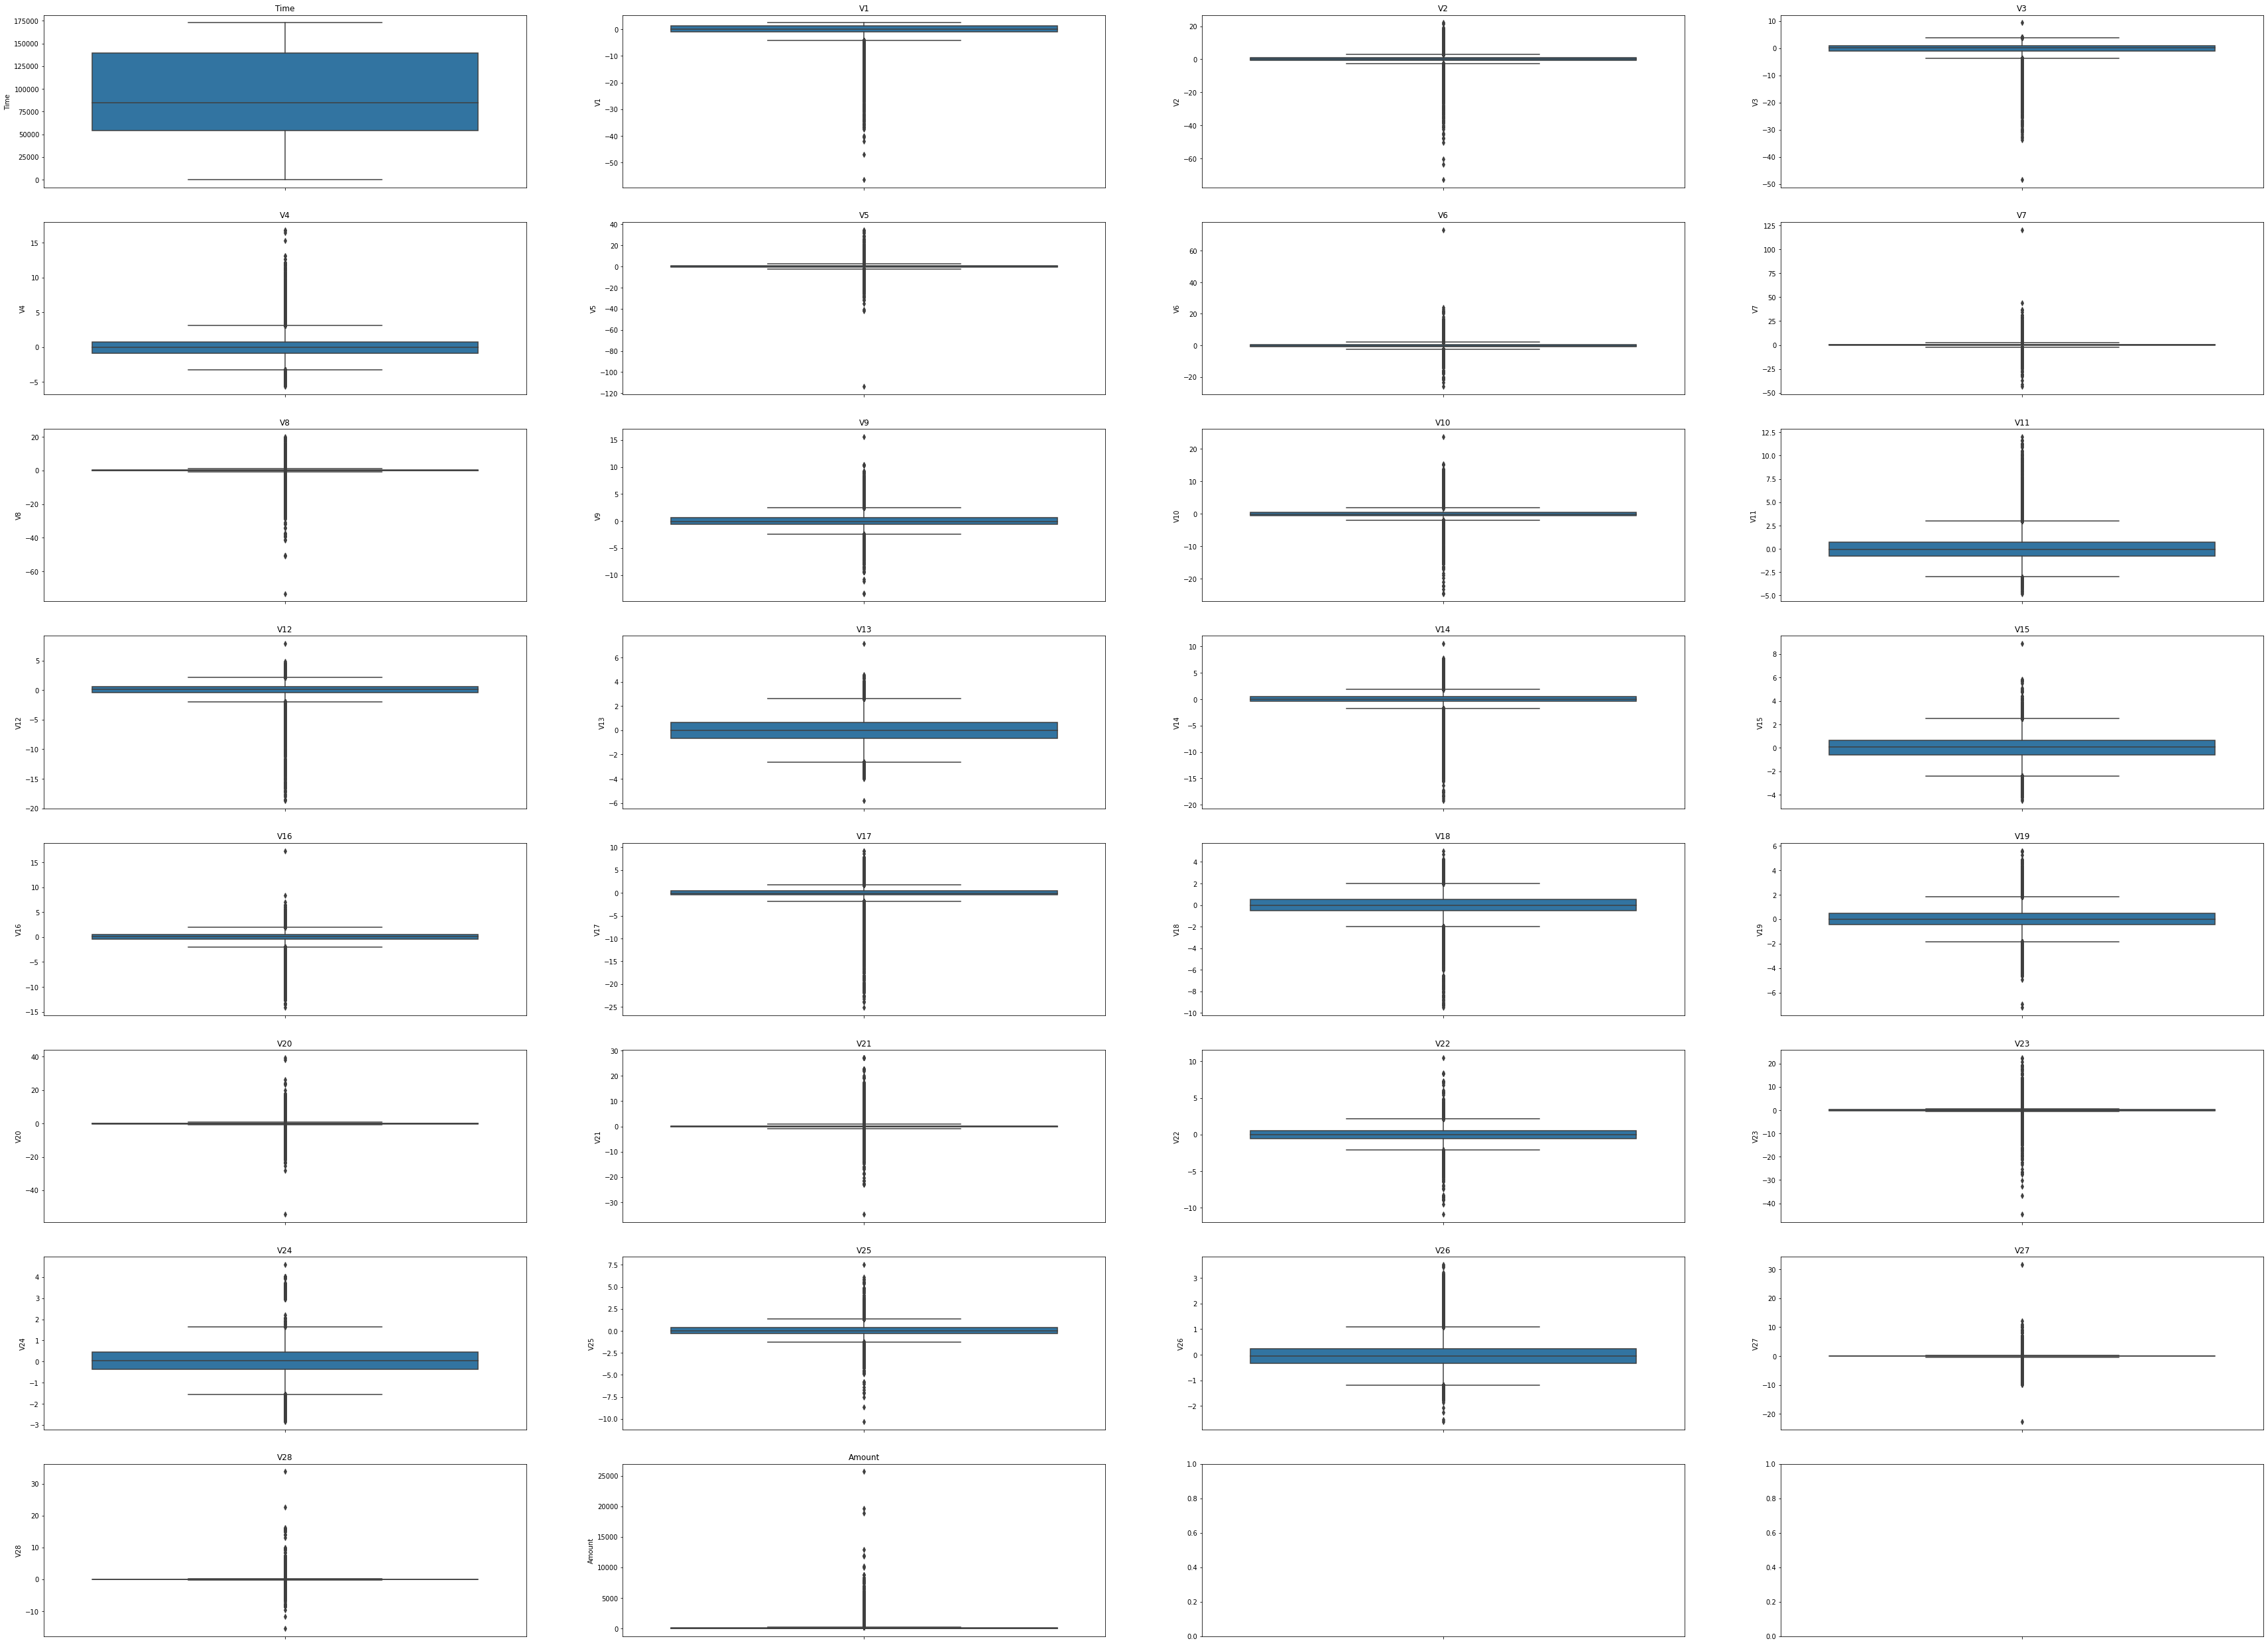

In [ ]:
def getarray(row,col):
  locarray = []
  for i in range(row):
    for j in range(col):
      temp = [i,j]
      locarray.append(temp)
  return locarray

InputData = pd.read_csv('/content/drive/My Drive/ColabDataInputs/creditcard.csv')
colslist = list(InputData.columns)

row,col = 8,4
arrlist = getarray(row,col)
fig, axes = plt.subplots(row,col, sharex=True, figsize=(60,45))
for i in range(len(colslist)-1):
  sns.boxplot(x= InputData[colslist[i]], orient='v' , ax=axes[arrlist[i][0],arrlist[i][1]]).set_title(colslist[i])
fig.savefig('/content/drive/My Drive/ColabOutputs/AttribBoxPlts.png')

In [ ]:
InputData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(InputData.describe())
prof = ProfileReport(InputData)
prof.to_file('/content/drive/My Drive/ColabOutputs/ML_CreditCard_ProfileReport.html')

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


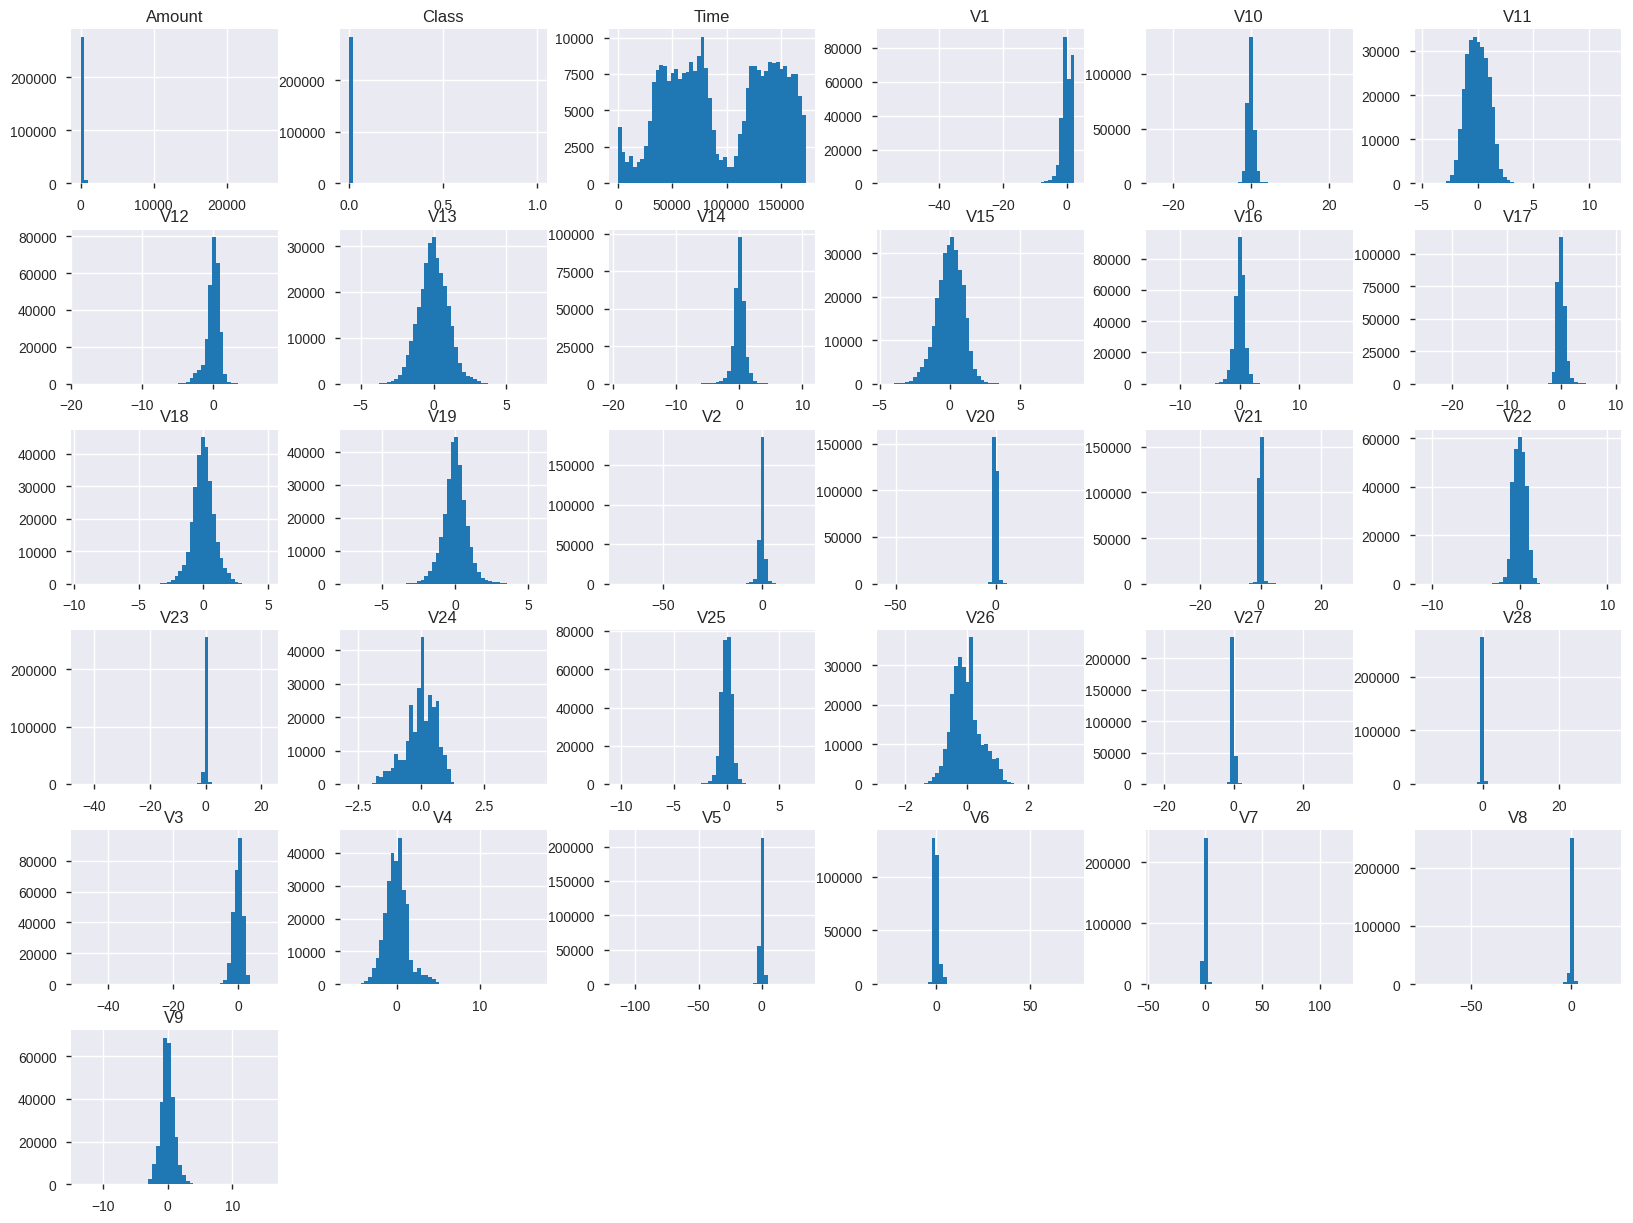

In [ ]:
InputData.hist(bins=50, figsize=(20,15))
plt.savefig('/content/drive/My Drive/ColabOutputs/MS_Creditcard_histogram.png',dpi=100)
plt.show()

In [ ]:
InputData_x = InputData[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
InputData_y = InputData[['Class']]
#BorutaPy to select features
featur_select.fit(InputData_x.values, InputData_y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=149, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FD176164990,
                                          verbose=0, warm_start=

In [ ]:
attrchk = list(featur_select.support_)
colslistX = list(InputData_x.columns)
ColsNeeded = []

for i in range(len(attrchk)):
  if attrchk[i] == True:
    ColsNeeded.append(colslistX[i])

#Removing the tentative & Rejected Features

InputData_FE_x = InputData_x[ColsNeeded]
InputData_FE_y = InputData_y

In [ ]:
print('Columns before Boruta Feature extraction are {} and the count is {}'.format(InputData_x.columns,len(InputData_x.columns)))
print('Columns after Boruta Feature extraction are {} and the count is {}'.format(InputData_FE_x.columns,len(InputData_FE_x.columns)))

Columns before Boruta Feature extraction are Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') and the count is 30
Columns after Boruta Feature extraction are Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V27', 'V28', 'Amount'],
      dtype='object') and the count is 25


In [ ]:
zScore = np.abs(stats.zscore(InputData_FE_x))
ZInputData_x = pd.DataFrame(data=zScore, index = None, columns=list(InputData_FE_x.columns))
ZInputData = pd.concat([ZInputData_x, InputData_FE_y], axis = 1)

# Threshold = 3
ZInputDataWO = ZInputData.query('V1 <= 3.0' or 'V2 <= 3.0' or 'V3 <= 3.0' or 'V4 <= 3.0' or 'V5 <= 3.0' or 'V6 <= 3.0' or 'V7 <= 3.0' or 'V8 <= 3.0' or 'V9 <= 3.0' or 'V10 <= 3.0' or 'V11 <= 3.0' or 'V12 <= 3.0' or 'V13 <= 3.0' or 'V14 <= 3.0' or 'V15 <= 3.0' or 'V16 <= 3.0' or 'V17 <= 3.0' or 'V18 <= 3.0' or 'V19 <= 3.0' or 'V20 <= 3.0' or 'V21 <= 3.0' or 'V22 <= 3.0' or 'V23 <= 3.0' or 'V24 <= 3.0' or 'V25 <= 3.0' or 'V26 <= 3.0' or 'V27 <= 3.0' or 'V28 <= 3.0' or 'Amount <= 3.0')

print("Overall Input data shape is ",ZInputData.shape)
print("The Outlier corrected Data shape is ",ZInputDataWO.shape)

ZInputData_x = ZInputData[ColsNeeded]
ZInputData_y = ZInputData['Class']

Overall Input data shape is  (284807, 26)
The Outlier corrected Data shape is  (281106, 26)


In [ ]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
# Define dictionary with performance metrics
Score = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Instantiate the ML classifiers
logregr = LogisticRegression(max_iter=10000)
svcSvm = LinearSVC(dual=False)
dtree = DecisionTreeClassifier()
ranfor = RandomForestClassifier()
gaussNB = GaussianNB()
ANNModel = MLPClassifier()

# Function to evaluate the models
def models_evaluation(X, Y, FoldCount):
    
    '''
    X : data set features
    Y : data set target
    FoldCount : number of cross-validation folds
    
    '''
    
    # Cross validation on each ML model
    log = cross_validate(logregr, X, Y, cv=FoldCount, scoring=Score)
    svc = cross_validate(svcSvm, X, Y, cv=FoldCount, scoring=Score)
    dtr = cross_validate(dtree, X, Y, cv=FoldCount, scoring=Score)
    rfc = cross_validate(ranfor, X, Y, cv=FoldCount, scoring=Score)
    gnb = cross_validate(gaussNB, X, Y, cv=FoldCount, scoring=Score)
    ANN = cross_validate(ANNModel, X, Y, cv=FoldCount, scoring=Score)

    # Dataframe with scores of each ML Model
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                        
                                       'Artificial Neural Networks':[ANN['test_accuracy'].mean(),
                                                               ANN['test_precision'].mean(),
                                                               ANN['test_recall'].mean(),
                                                               ANN['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Classification Algo' column
    models_scores_table['Best Classification Algo'] = models_scores_table.idxmax(axis=1)
    
    return(models_scores_table)

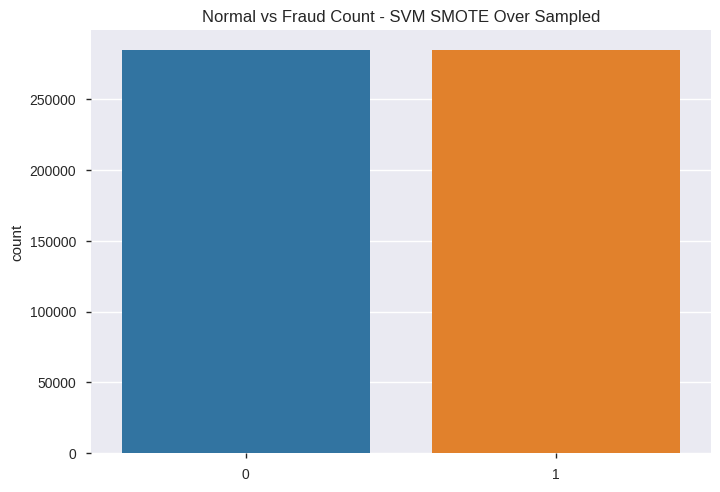

In [ ]:
# Run models_evaluation function
ActualDataPerfromance = models_evaluation(ZInputData_x, ZInputData_y, 5)

osam_Input_x,osam_Input_y=oversample.fit_sample(ZInputData_x, ZInputData_y)
sns.countplot(x=osam_Input_y).set_title("Normal vs Fraud Count - SMOTE Over Sampled")
SMOTEDataPerfromance = models_evaluation(osam_Input_x, osam_Input_y, 5)

RandUS_Input_x,RandUS_Input_y=oversample.fit_sample(ZInputData_x, ZInputData_y)
sns.countplot(x=RandUS_Input_y).set_title("Normal vs Fraud Count - Random Under Sampled")
RANDUSDataPerfromance = models_evaluation(RandUS_Input_x, RandUS_Input_y, 5)

SVMSMOTE_Input_x,SVMSMOTE_Input_y=oversample.fit_sample(ZInputData_x, ZInputData_y)
sns.countplot(x=SVMSMOTE_Input_y).set_title("Normal vs Fraud Count - SVM SMOTE Over Sampled")
SVMSMOTEDataPerfromance = models_evaluation(SVMSMOTE_Input_x, SVMSMOTE_Input_y, 5)

In [ ]:
print('ActualDataPerfromance is ',ActualDataPerfromance.head())
print('SMOTEDataPerfromance is ',SMOTEDataPerfromance.head())
print('RandomUnderSamplingPerformance is ',RANDUSDataPerfromance.head())
print('SVM SMOTE Performance is ',SVMSMOTEDataPerfromance.head())

ActualDataPerfromance is             Logistic Regression  ...   Best Classification Algo
Accuracy              0.999038  ...              Random Forest
Precision             0.865639  ...  Support Vector Classifier
Recall                0.554442  ...       Gaussian Naive Bayes
F1 Score              0.658914  ...              Random Forest

[4 rows x 7 columns]
SMOTEDataPerfromance is             Logistic Regression  ...  Best Classification Algo
Accuracy              0.929142  ...             Random Forest
Precision             0.960169  ...             Random Forest
Recall                0.895556  ...             Random Forest
F1 Score              0.926705  ...             Random Forest

[4 rows x 7 columns]
RandomUnderSamplingPerformance is             Logistic Regression  ...  Best Classification Algo
Accuracy              0.929142  ...             Random Forest
Precision             0.960169  ...             Random Forest
Recall                0.895556  ...             Random Fore

In [ ]:
ActualDataPerfromance['Type'] = 'ActualDataPerfromance'
SMOTEDataPerfromance['Type'] = 'SMOTEDataPerfromance'
RANDUSDataPerfromance['Type'] = 'RANDUSDataPerfromance'
SVMSMOTEDataPerfromance['Type'] = 'SVMSMOTEDataPerfromance'
OverallPerformance = pd.concat([ActualDataPerfromance,SMOTEDataPerfromance,RANDUSDataPerfromance,SVMSMOTEDataPerfromance])
OverallPerformance.to_csv('/content/drive/My Drive/ColabOutputs/MLPerformanceResults.csv')